# Steps followed:
    1. Data Quality Check
    2. EDA: Univariate and Bivariate Analysis
    3. Outlier
    4. Hopkin's Test
    5. Scaling
    6. Finding best value ok k: silhouette Score and SSD elbow
    7. Final K mean Analysis
    8. Visualization of the clusters using Scatterplot
    9. Cluster profiling: gdpp, child_mort and income
    10.Hierarchial analysis: Single linkage and Complete linkage and visaulization
    11.Final list of countries with insights

In [436]:
silhouette import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# 1. Data Quality Check

In [518]:
# readding data
country_df= pd.read_csv("E:\\CLSS_1\\ML\\Assignment1- manali\\Country-data.csv")

In [438]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [439]:
#understanding the data shape
country_df.shape

(167, 10)

In [440]:
#checking the datatypes
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [441]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [442]:
#checking for null values
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# INSIGHTS:
    1. the data dosent have any null values
    2. The min max values of the colums seems to be more or less in range

# 2. Exploratory Data Analysis: Univariate and Bivariate Analysis

In [443]:
#converting imports, exports and health to percentage of gdpp
country_df["exports"]=(country_df["exports"]*country_df["gdpp"])/100

country_df["imports"]=(country_df["imports"]*country_df["gdpp"])/100

country_df["health"]=(country_df["health"]*country_df["gdpp"])/100

In [444]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [445]:
col= country_df.columns[1:]
list(col)

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

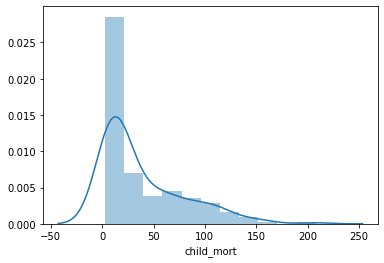

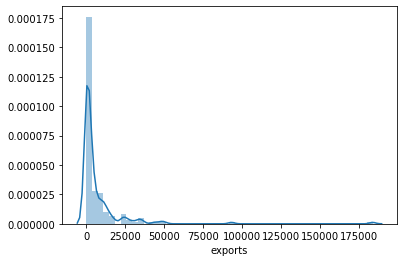

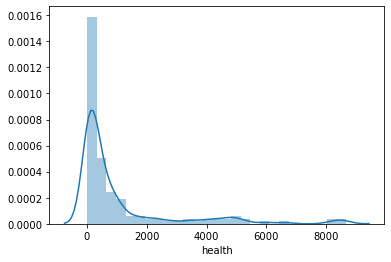

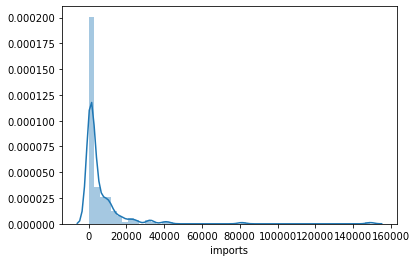

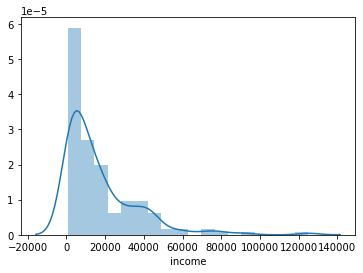

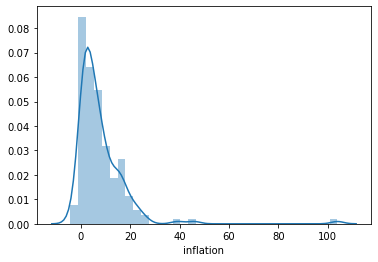

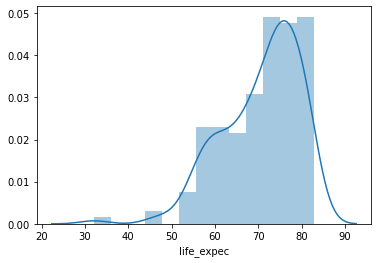

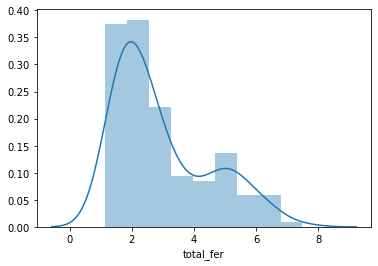

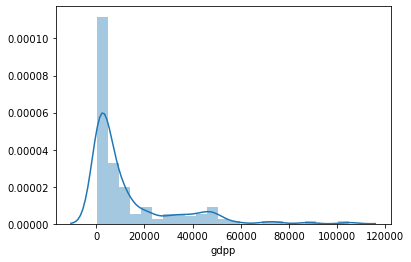

In [446]:
for c in col:
    sns.distplot(country_df[c])
    plt.show()

In [447]:
country_df[col].corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


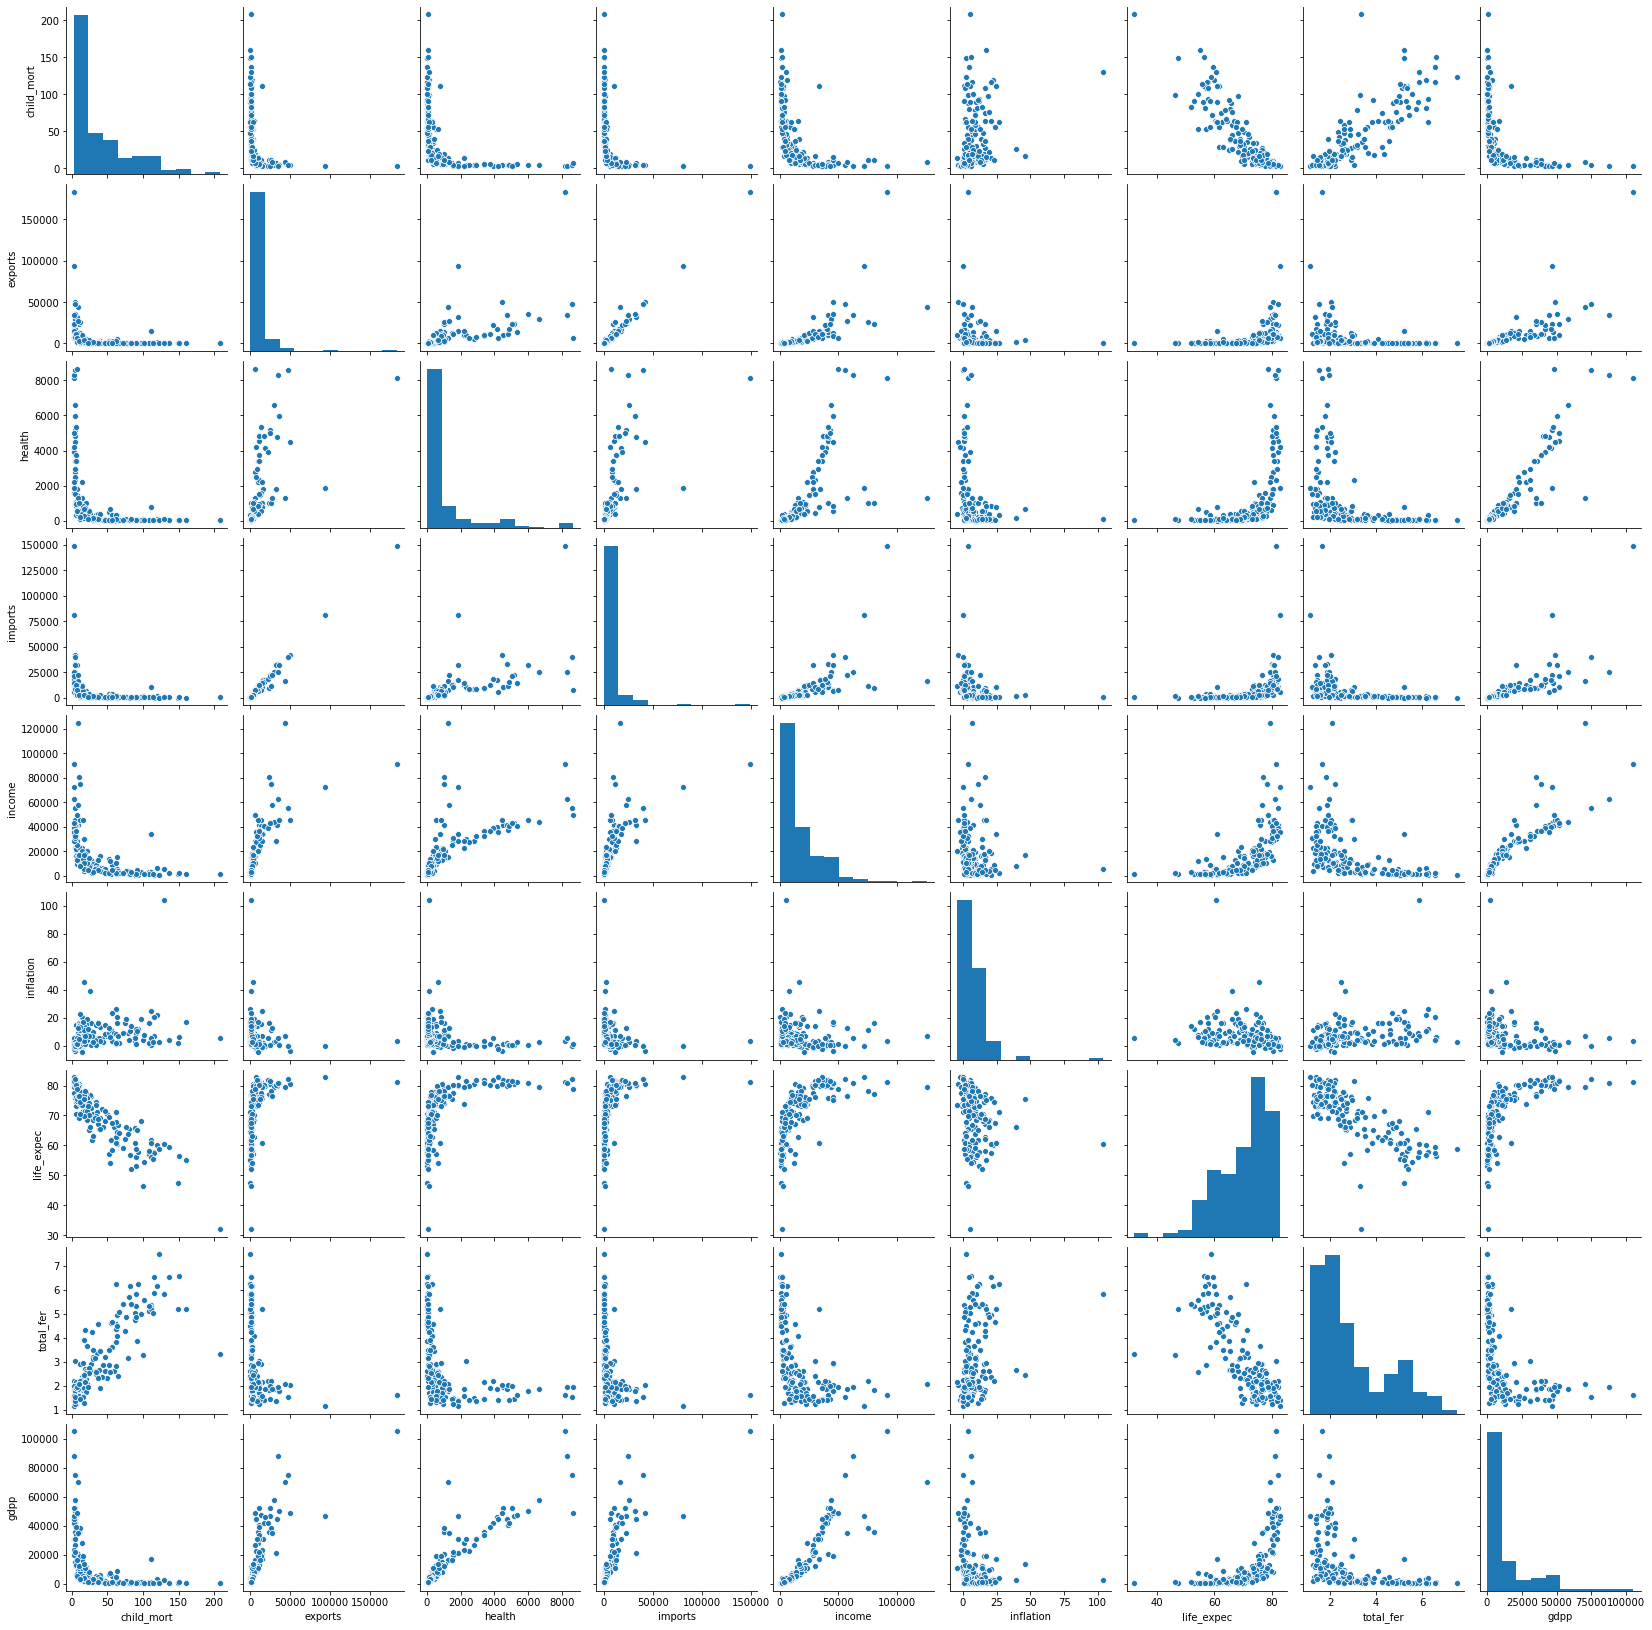

In [448]:
sns.pairplot(country_df)
plt.show()

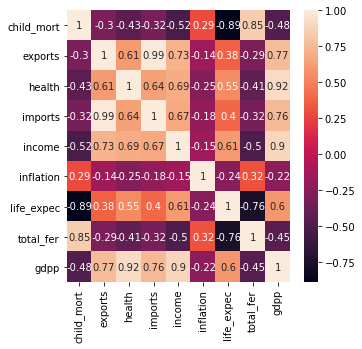

In [449]:
# plotting a heatmap to undestand the corr
plt.figure(figsize=(5,5))
sns.heatmap(country_df[col].corr(), annot=True);

Insights:
1. We can see high negative correlation between lif_expec and child_mort, lif_expec and total_fer
2. We can see high correlation between exports and imports, child_mort and total_fer
3. exports, imports, health and income displays a good positive correlation with gdpp


# 3. OUTLIER TREATMENT

In [450]:
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

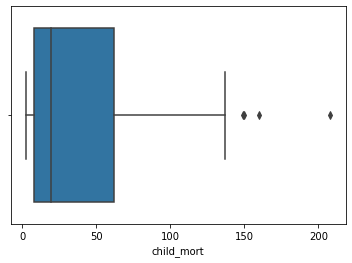

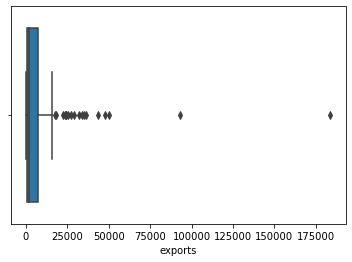

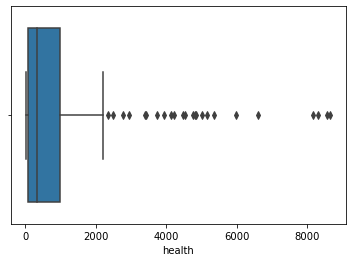

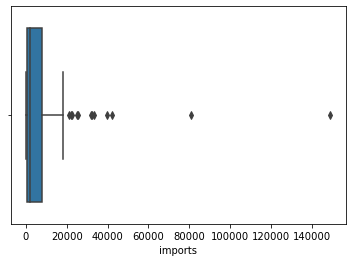

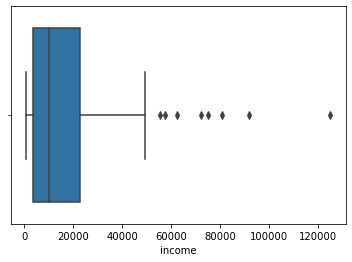

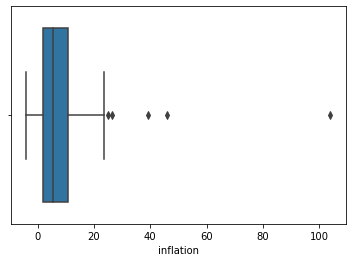

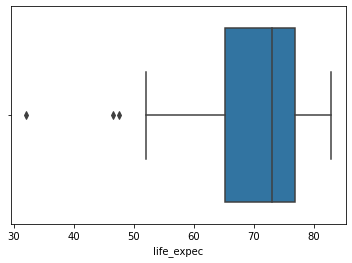

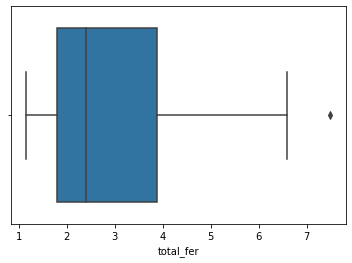

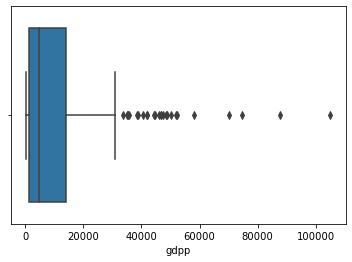

In [451]:
for c in col:
    sns.boxplot(country_df[c])
    plt.show()

we see a high amount of outliers in exports, health, imports, income and gdpp, and we need to check on the necessary outlier treatment 

we use soft capping outlier treatment in this case

In [452]:
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [453]:
q1 = country_df['child_mort'].quantile(0.01)
q2 = country_df['child_mort'].quantile(0.99)
print(q1," ",q2)

country_df['child_mort'][country_df['child_mort']<=q1] = q1
country_df['child_mort'][country_df['child_mort']>=q2] = q2

2.8   153.40000000000003


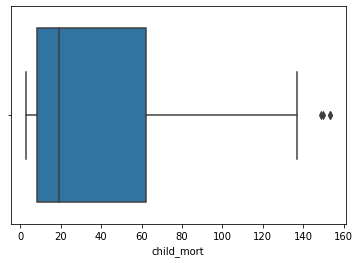

In [454]:
sns.boxplot(country_df["child_mort"])
plt.show()

In [455]:
q1 = country_df['exports'].quantile(0.01)
q2 = country_df['exports'].quantile(0.99)
print(q1," ",q2)

country_df['exports'][country_df['exports']<=q1] = q1
country_df['exports'][country_df['exports']>=q2] = q2

22.243716000000003   64794.26000000014


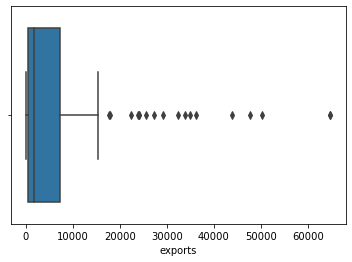

In [456]:
sns.boxplot(country_df["exports"])
plt.show()

In [457]:
q1 = country_df['health'].quantile(0.01)
q2 = country_df['health'].quantile(0.99)
print(q1," ",q2)

country_df['health'][country_df['health']<=q1] = q1
country_df['health'][country_df['health']>=q2] = q2

17.009362   8410.3304


In [458]:
q1 = country_df['imports'].quantile(0.01)
q2 = country_df['imports'].quantile(0.99)
print(q1," ",q2)

country_df['imports'][country_df['imports']<=q1] = q1
country_df['imports'][country_df['imports']>=q2] = q2

104.90964000000001   55371.39000000013


In [459]:
q1 = country_df['income'].quantile(0.01)
q2 = country_df['income'].quantile(0.99)
print(q1," ",q2)

country_df['income'][country_df['income']<=q1] = q1
country_df['income'][country_df['income']>=q2] = q2

742.24   84374.00000000003


In [460]:
q1 = country_df['inflation'].quantile(0.01)
q2 = country_df['inflation'].quantile(0.99)
print(q1," ",q2)

country_df['inflation'][country_df['inflation']<=q1] = q1
country_df['inflation'][country_df['inflation']>=q2] = q2

-2.3487999999999998   41.47800000000002


In [461]:
q1 = country_df['gdpp'].quantile(0.01)
q2 = country_df['gdpp'].quantile(0.99)
print(q1," ",q2)

country_df['gdpp'][country_df['gdpp']<=q1] = q1
country_df['gdpp'][country_df['gdpp']>=q2] = q2

331.62   79088.00000000004


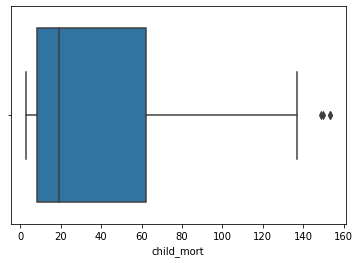

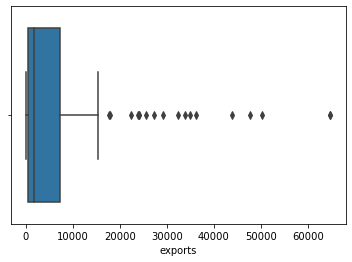

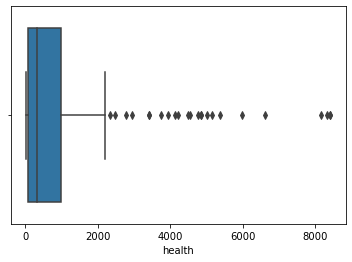

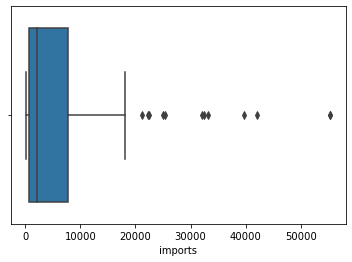

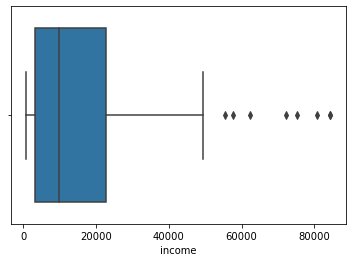

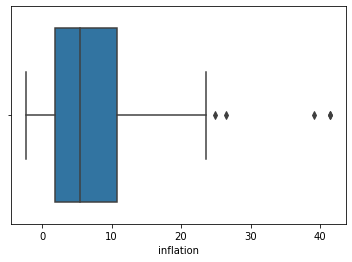

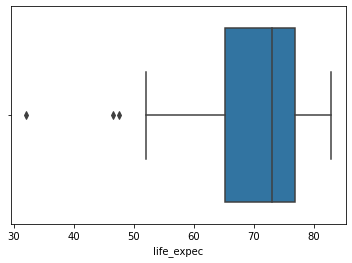

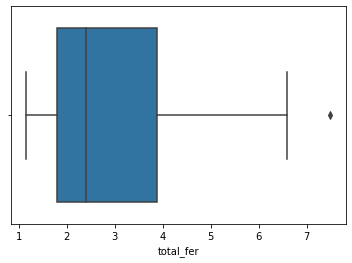

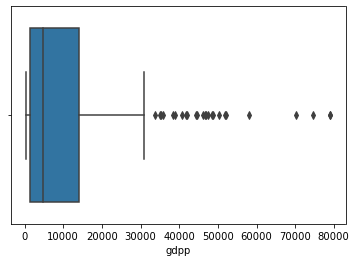

In [462]:
for c in col:
    sns.boxplot(country_df[c])
    plt.show()

INSIGHTS:
    1. In this dataset we have only 167 records and dropping any rows will not be advisable 
    2. We use soft capping in order to prevent dropping on any rows which can impact our analysis
    3. We have not capped any lower end outliers as these variables could be from those countries which require aid from  the NGO
    4.We have mostly capped outliers to 99 percentile as those countries are categorized as developed nations and will not require external aids from the NGO

# 4.  HOPKIN'S TEST

In [463]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [464]:
hopkins(country_df.drop('country', axis=1))

0.9292563888865134

We understand that our data is 92.92% different from randomly scattered data.


Less than 50 - Useless

50-65 - Can Consider

65-84 - Good

85 and Above - Data can be clustered

# 5. SCALING

In [465]:
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [466]:

from sklearn.preprocessing import StandardScaler

#SCALING
scaler = StandardScaler()

# fit_transform
country_df_scaled = scaler.fit_transform(country_df[['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp']])


In [467]:
country_df_scaled

array([[ 1.34401227, -0.56963804, -0.56698288, ..., -1.61909203,
         1.90288227, -0.70231404],
       [-0.54754345, -0.47387318, -0.44041711, ...,  0.64786643,
        -0.85997281, -0.49877488],
       [-0.27254826, -0.42401465, -0.48629503, ...,  0.67042323,
        -0.0384044 , -0.47748297],
       ...,
       [-0.3753502 , -0.49162206, -0.54027452, ...,  0.28695762,
        -0.66120626, -0.65875194],
       [ 0.47276581, -0.53996578, -0.55245405, ..., -0.34463279,
         1.14094382, -0.65875194],
       [ 1.16153882, -0.52703195, -0.54229642, ..., -2.09278484,
         1.6246091 , -0.65012008]])

In [468]:
country_df_scaled.shape

(167, 9)

In [469]:
type(country_df_scaled)

numpy.ndarray

In [470]:
country_df_scaled = pd.DataFrame(country_df_scaled)


In [471]:
country_df_scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079


In [472]:
country_df_scaled.shape

(167, 9)

In [473]:
col

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [474]:
country_df_scaled.columns = list(col)

In [475]:
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079


In [476]:
country_df_scaled.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02,1.670000e+02
mean,-5.717316e-17,1.256480e-16,1.595530e-17,-1.076983e-16,-1.728491e-17,-1.548994e-16,3.616535e-16,3.124580e-16,-3.988825e-17
std,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00,1.003008e+00
min,-9.022102e-01,-5.725426e-01,-5.809334e-01,-6.141081e-01,-9.002438e-01,-1.257940e+00,-4.337186e+00,-1.191250e+00,-7.150535e-01
25%,-7.621425e-01,-5.352087e-01,-5.464738e-01,-5.571244e-01,-7.542976e-01,-7.211609e-01,-5.927576e-01,-7.639023e-01,-6.576010e-01
50%,-4.781521e-01,-4.183210e-01,-4.101778e-01,-4.075221e-01,-3.853490e-01,-2.590877e-01,2.869576e-01,-3.564309e-01,-4.659738e-01
75%,6.218286e-01,6.498977e-02,-4.329444e-02,1.964821e-01,3.318805e-01,4.327313e-01,7.042584e-01,6.175252e-01,7.438032e-02
max,2.968283e+00,5.118698e+00,4.120007e+00,5.269055e+00,3.771342e+00,4.398816e+00,1.380962e+00,3.009349e+00,3.817038e+00


# 6. Finding best value ok k: Silhouette  Score and SSD elbow

Silhouette Analysis
silhouette score=𝑝−𝑞𝑚𝑎𝑥(𝑝,𝑞)
 
𝑝  is the mean distance to the points in the nearest cluster that the data point is not a part of

𝑞  is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [520]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(country_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4691402080700722
For n_clusters=3, the silhouette score is 0.40442323247838274
For n_clusters=4, the silhouette score is 0.39278006155982664
For n_clusters=5, the silhouette score is 0.38445762603127503
For n_clusters=6, the silhouette score is 0.3003995365544493
For n_clusters=7, the silhouette score is 0.310158419943264
For n_clusters=8, the silhouette score is 0.31663291165519186


# SSD

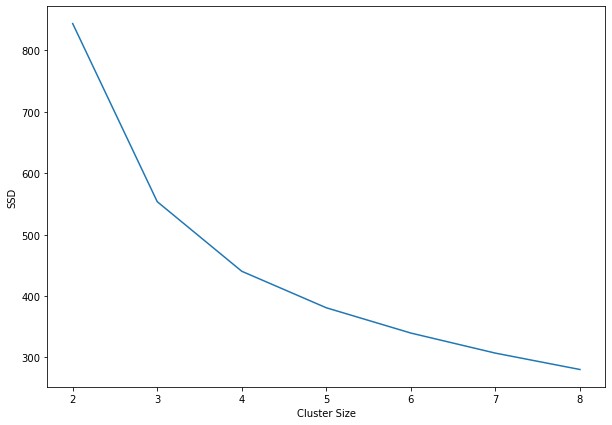

In [478]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_df_scaled)
    
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
sns.lineplot(y=ssd,x=range_n_clusters)
plt.xlabel('Cluster Size')
plt.ylabel('SSD')
plt.show()


Insights:
1. Elbow curve - Post cluster 3, there is not a very signficant differnce in distance between the points
2. The sihouette score drops after K = 3
Based on above analysis, 3 seems to be the optimum number to create clusters

# 7. Final K mean Analysis

In [479]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=100,random_state=0)
kmeans.fit(country_df_scaled)

KMeans(max_iter=100, n_clusters=3, random_state=0)

In [480]:
# Centroid value for the final clusters

print(kmeans.cluster_centers_)

[[ 1.34749254 -0.49725446 -0.52608487 -0.53720606 -0.72379806  0.41448121
  -1.27627565  1.3543418  -0.6241439 ]
 [-0.44608365 -0.26896584 -0.29423633 -0.24319265 -0.17060836 -0.03429503
   0.32004093 -0.46744568 -0.28478671]
 [-0.84593495  1.65776344  1.78390839  1.64390447  1.72748481 -0.57960501
   1.11922578 -0.79097569  1.91688659]]


In [481]:
kmeans.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [482]:
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079


In [483]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [484]:
country = pd.DataFrame(country_df["country"])
country.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [485]:

country_df_new = pd.concat([country,country_df_scaled],axis=1)
country_df_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,Albania,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,Algeria,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,Angola,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,Antigua and Barbuda,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079


In [486]:
country_df_new['cluster_id'] = kmeans.labels_

In [487]:
country_df_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314,0
1,Albania,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775,1
2,Algeria,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483,1
3,Angola,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000,0
4,Antigua and Barbuda,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079,1


In [488]:
country_df_new['cluster_id'].value_counts()

1    90
0    48
2    29
Name: cluster_id, dtype: int64

# 8. Visualization of the clusters using Scatterplot

Plotting:gdpp, child_mort and income


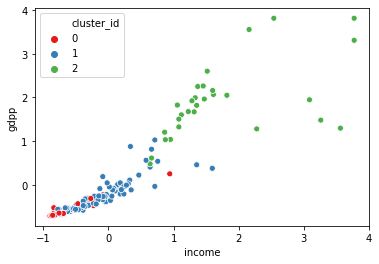

In [489]:
sns.scatterplot(x='income', y='gdpp',hue='cluster_id', data=country_df_new, palette='Set1');

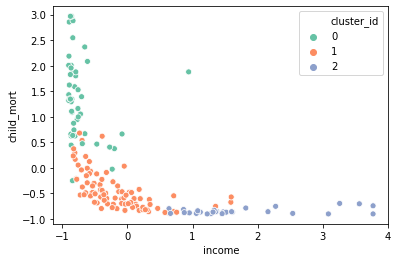

In [490]:
sns.scatterplot(x='income', y='child_mort',hue='cluster_id', data=country_df_new, palette='Set2');

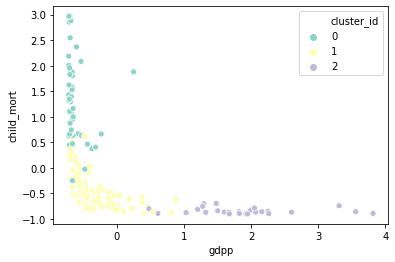

In [491]:
sns.scatterplot(x='gdpp', y='child_mort',hue='cluster_id', data=country_df_new, palette='Set3');

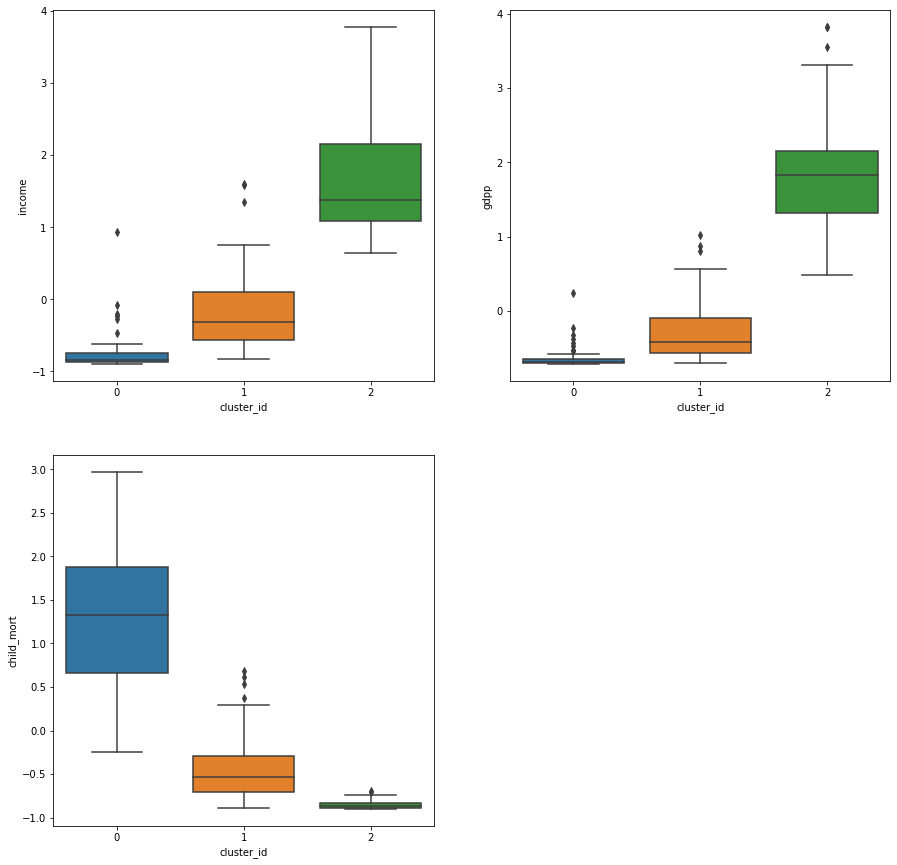

In [492]:


plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.boxplot(x=country_df_new['cluster_id'],y=country_df_new['income'])
plt.subplot(2,2,2)
sns.boxplot(x=country_df_new['cluster_id'],y=country_df_new['gdpp'])
plt.subplot(2,2,3)
sns.boxplot(x=country_df_new['cluster_id'],y=country_df_new['child_mort'])
plt.show()

INSIGHTS:	

We get a list of similar Cluster of countries

    Cluster 0: Under developed Countries-Countries with low income and low GDP per person and high child mortality
    Cluster 1: Developing Countries- Countries with average income and average GDP per person and quite low child mortality rate 
    Cluster 2: Developed Countries- Countries with high income and high GDP per person and low child mortality rate 


Therefore we should look into Cluster 0 countries for the NGO to provide aid to them

# 9. Cluster profiling: gdpp, child_mort and income

In [519]:
country_df_new.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314,0
1,Albania,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775,1
2,Algeria,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483,1
3,Angola,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000,0
4,Antigua and Barbuda,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079,1


In [494]:
country_df_new[['income','child_mort','gdpp','cluster_id']].groupby('cluster_id').mean()

,income,child_mort,gdpp
cluster_id,,,
0,-0.723798,1.347493,-0.624144
1,-0.170608,-0.446084,-0.284787
2,1.727485,-0.845935,1.916887


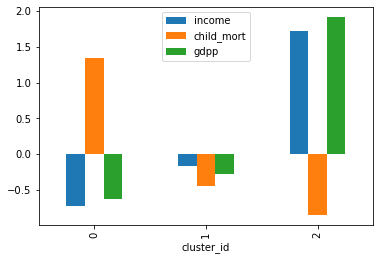

In [495]:
country_df_new[['income','child_mort','gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind='bar')

In [496]:
c1 = country_df_new[country_df_new['cluster_id']==0]

In [497]:

# This is the cluster of countries which are in the dire need of aid
c1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314,0
3,Angola,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000,0
17,Benin,1.878582,-0.558646,-0.573054,-0.595259,-0.840041,-0.840551,-0.987502,1.598107,-0.690517,0
21,Botswana,0.375104,-0.331232,-0.295269,-0.278507,-0.198780,0.196532,-1.517586,-0.045030,-0.368722,0
25,Burkina Faso,2.007085,-0.564797,-0.568754,-0.607158,-0.861826,-0.075807,-1.427359,1.936010,-0.701048,0
26,Burundi,1.431394,-0.572543,-0.575452,-0.614108,-0.899028,0.632791,-1.449916,2.194407,-0.715054,0
28,Cameroon,1.801481,-0.548944,-0.552821,-0.587624,-0.793120,-0.708254,-1.495030,1.432468,-0.658752,0
31,Central African Republic,2.855201,-0.569873,-0.580518,-0.612694,-0.892102,-0.695347,-2.600313,1.498724,-0.708471,0
32,Chad,2.880901,-0.545493,-0.567702,-0.583739,-0.833897,-0.130017,-1.585257,2.413050,-0.682518,0
36,Comoros,1.292611,-0.563348,-0.571035,-0.582954,-0.862943,-0.455275,-0.525087,1.193948,-0.689884,0


In [498]:
c1.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
88,Liberia,1.320882,-0.569009,-0.568849,-0.593042,-0.900244,-0.248762,-1.100286,1.372838,-0.715054,0
26,Burundi,1.431394,-0.572543,-0.575452,-0.614108,-0.899028,0.632791,-1.449916,2.194407,-0.715054,0
37,"Congo, Dem. Rep.",2.007085,-0.562435,-0.575663,-0.607641,-0.900244,1.729892,-1.472473,2.379922,-0.714917,0
112,Niger,2.186988,-0.567709,-0.580403,-0.607087,-0.896235,-0.625649,-1.325854,3.009349,-0.714111,0
132,Sierra Leone,2.968283,-0.568607,-0.561185,-0.610622,-0.873557,1.265237,-1.754433,1.492098,-0.711176,0
93,Madagascar,0.624399,-0.565425,-0.580933,-0.606371,-0.864061,0.179753,-1.100286,1.094565,-0.710370,0
106,Mozambique,1.621578,-0.562900,-0.578234,-0.604669,-0.890426,0.031321,-1.810825,1.730618,-0.710025,0
31,Central African Republic,2.855201,-0.569873,-0.580518,-0.612694,-0.892102,-0.695347,-2.600313,1.498724,-0.708471,0
94,Malawi,1.351722,-0.565302,-0.573519,-0.608223,-0.884170,0.606977,-1.968722,1.564979,-0.707723,0
50,Eritrea,0.444495,-0.572468,-0.580933,-0.613321,-0.862385,0.542441,-0.998780,1.101191,-0.706400,0


Insights:
    1. here we see a list of 10 nations where the income and gdpp are the lowest and child_mort is the highest
    2. These nations needs grants from the NGO

# 10. Hierarchial Clustering: Single linkage, Complete linkage, Visualization

In [499]:
country_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079


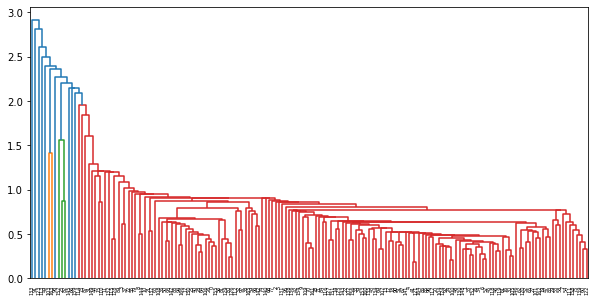

In [515]:
# single linkage
mergings = linkage(country_df_scaled, method="single", metric='euclidean')
plt.figure(figsize=(10, 5))
dendrogram(mergings)
plt.show()

The clusters obtained cannot lead to any conclusive outcomes

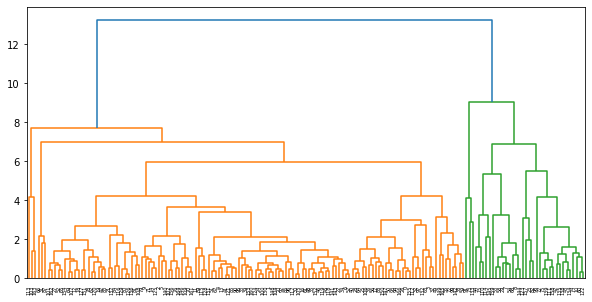

In [516]:
# complete linkage
mergings = linkage(country_df_scaled, method="complete", metric='euclidean')
plt.figure(figsize=(10, 5))
dendrogram(mergings)
plt.show()

we can make out the 3 distinct clusters

In [502]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [503]:

country2 = pd.DataFrame(country_df["country"])


In [504]:
country2.head()

,country
0,Afghanistan
1,Albania
2,Algeria
3,Angola
4,Antigua and Barbuda


In [505]:
#Concatinating the country names
country_df_new2 = pd.concat([country2,country_df_scaled],axis=1)


In [506]:
country_df_new2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314
1,Albania,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775
2,Algeria,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483
3,Angola,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000
4,Antigua and Barbuda,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079


In [507]:
country_df_new2['cluster_labels'] = cluster_labels
country_df_new2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314,0
1,Albania,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775,0
2,Algeria,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483,0
3,Angola,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000,0
4,Antigua and Barbuda,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079,0


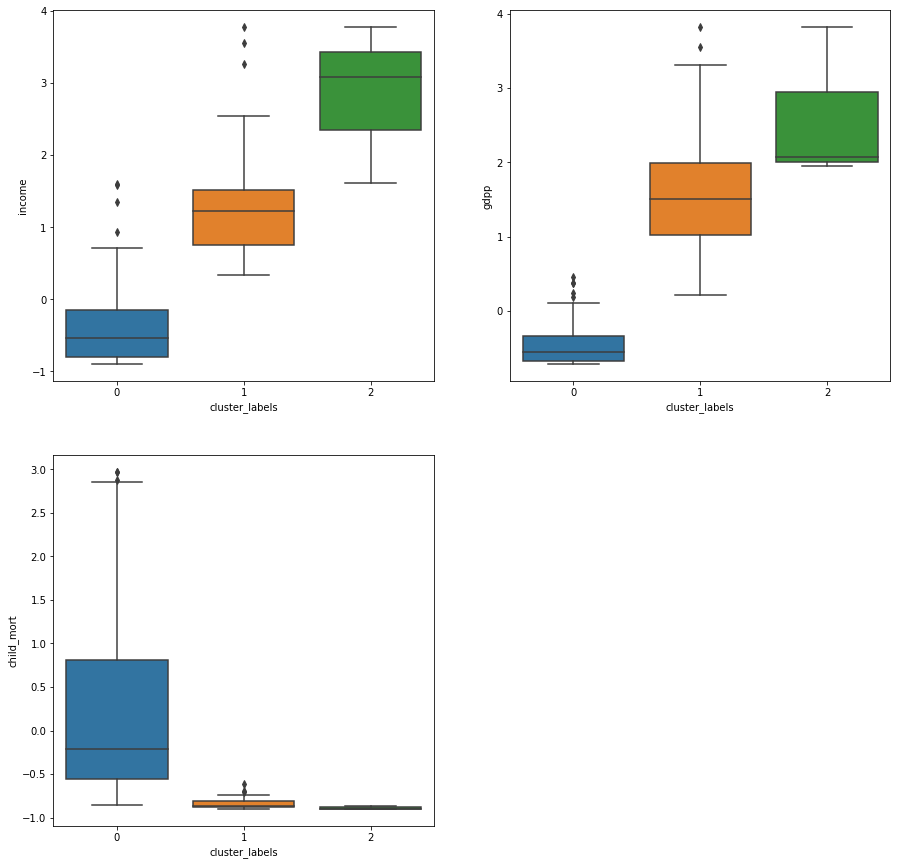

In [508]:
#Visualization

plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.boxplot(x=country_df_new2['cluster_labels'],y=country_df_new2['income'])
plt.subplot(2,2,2)
sns.boxplot(x=country_df_new2['cluster_labels'],y=country_df_new2['gdpp'])
plt.subplot(2,2,3)
sns.boxplot(x=country_df_new2['cluster_labels'],y=country_df_new2['child_mort'])
plt.show()

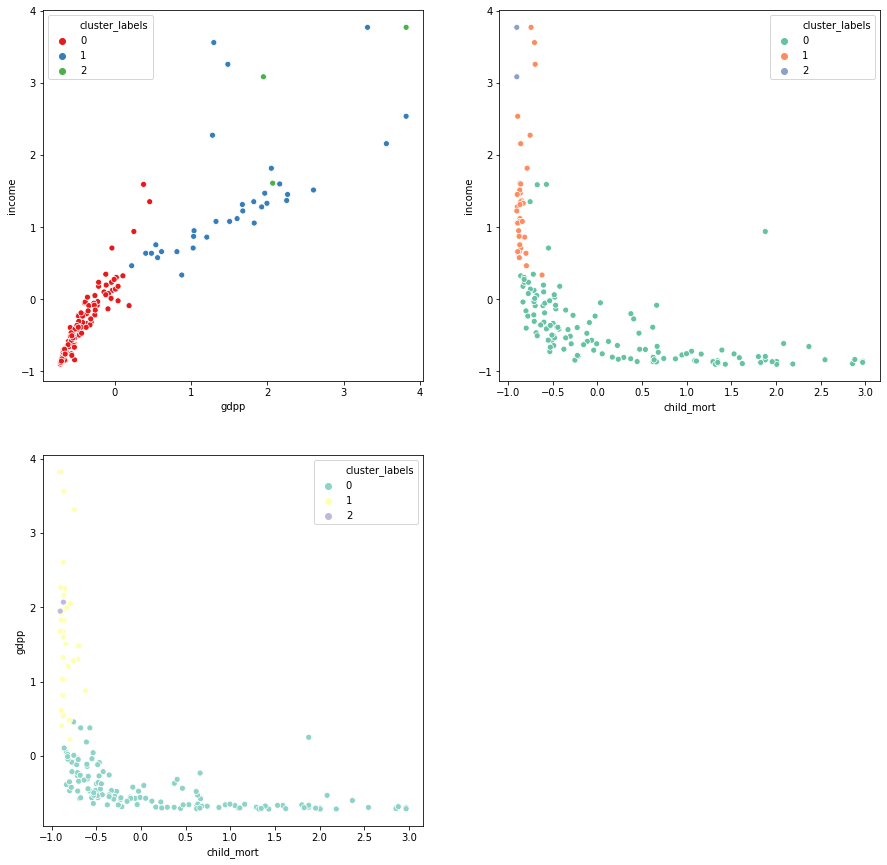

In [517]:
plt.figure(figsize=(15, 15))
plt.subplot(2,2,1)
sns.scatterplot(y='income', x='gdpp',hue='cluster_labels', data=country_df_new2, palette='Set1')
plt.subplot(2,2,2)
sns.scatterplot(y='income', x='child_mort',hue='cluster_labels', data=country_df_new2, palette='Set2');
plt.subplot(2,2,3)
sns.scatterplot(y='gdpp', x='child_mort',hue='cluster_labels', data=country_df_new2, palette='Set3')
plt.show()


INSIGHTS:	

We get a list of similar Cluster of countries

    Cluster 0: Under developed Countries-Countries with low income and low GDP per person and high child mortality
    Cluster 1: Developing Countries- Countries with average income and average GDP per person and quite low child mortality rate 
    Cluster 2: Developed Countries- Countries with high income and high GDP per person and low child mortality rate 


# 11. Final list of countries with insights

In [510]:
country_df_new2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314,0
1,Albania,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775,0
2,Algeria,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483,0
3,Angola,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000,0
4,Antigua and Barbuda,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079,0


In [511]:
country_df_new2[['income','child_mort','gdpp','cluster_labels']].groupby('cluster_labels').mean()

,income,child_mort,gdpp
cluster_labels,,,
0,-0.414098,0.231338,-0.458260
1,1.387233,-0.837414,1.581795
2,2.822708,-0.890217,2.610957


In [512]:
c2 = country_df_new2[country_df_new2['cluster_labels']==0]

In [513]:
c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.619092,1.902882,-0.702314,0
1,Albania,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.647866,-0.859973,-0.498775,0
2,Algeria,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.670423,-0.038404,-0.477483,0
3,Angola,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.179234,2.128151,-0.531000,0
4,Antigua and Barbuda,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.704258,-0.541946,-0.032079,0


In [514]:
c2.sort_values(by=['gdpp','income','child_mort'], ascending=[True, True, False]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
88,Liberia,1.320882,-0.569009,-0.568849,-0.593042,-0.900244,-0.248762,-1.100286,1.372838,-0.715054,0
26,Burundi,1.431394,-0.572543,-0.575452,-0.614108,-0.899028,0.632791,-1.449916,2.194407,-0.715054,0
37,"Congo, Dem. Rep.",2.007085,-0.562435,-0.575663,-0.607641,-0.900244,1.729892,-1.472473,2.379922,-0.714917,0
112,Niger,2.186988,-0.567709,-0.580403,-0.607087,-0.896235,-0.625649,-1.325854,3.009349,-0.714111,0
132,Sierra Leone,2.968283,-0.568607,-0.561185,-0.610622,-0.873557,1.265237,-1.754433,1.492098,-0.711176,0
93,Madagascar,0.624399,-0.565425,-0.580933,-0.606371,-0.864061,0.179753,-1.100286,1.094565,-0.710370,0
106,Mozambique,1.621578,-0.562900,-0.578234,-0.604669,-0.890426,0.031321,-1.810825,1.730618,-0.710025,0
31,Central African Republic,2.855201,-0.569873,-0.580518,-0.612694,-0.892102,-0.695347,-2.600313,1.498724,-0.708471,0
94,Malawi,1.351722,-0.565302,-0.573519,-0.608223,-0.884170,0.606977,-1.968722,1.564979,-0.707723,0
50,Eritrea,0.444495,-0.572468,-0.580933,-0.613321,-0.862385,0.542441,-0.998780,1.101191,-0.706400,0


# CONCLUSION:
    
    1. Post conducting K mean analysis and Hierachical clustering we can see the list of countries are same in both cases. 
    2. The following 10 nations needs the financial aid from the NGO:
        
        1. Liberia
        2. Burundi
        3. Congo, Dem. Rep.
        4. Niger
        5. Sierra Leone
        6. Madagascar
        7. Mozambique
        8. Central African Republic
        9. Malawi
        10. Eritrea	 
    